In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datasets import *
from models import *
from utils import *

from tqdm.notebook import tqdm
from torch.utils.data import DataLoader

import pickle
import torch
import numpy as np

In [4]:
with open('data/r4dbag.p', 'rb') as f:
    bag = pickle.load(f)

# Test Dataset

In [59]:
# hp
lr = 1e-3
epochs = 400
#device = torch.device('cuda')
device = torch.device('cpu')
num_layers = 4

# objects
dataset = LSTMDataset(bag, start=1500, end=-1500, normalize_self=True)
dataloader = DataLoader(dataset, batch_size=256, shuffle=True, collate_fn=lstm_collate_fn)
model = HorizonLSTM(num_layers=num_layers, input_size=11, output_size=6)
criterion = MATELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

# loss
loss_history = []

In [73]:
pbar = tqdm(range(epochs), desc="Loss: N/A")
for e in pbar:
    total_loss = 0
    it = 0
    dl_pbar = tqdm(dataloader, leave=False)
    for j, (x, y, m) in enumerate(dl_pbar):
        x, y, m = x.to(device), y.to(device), m.to(device)
        out, _ = model(x)

        transformed_mask = m.bool().unsqueeze(-1).expand(-1, -1, y.shape[-1])
        y_pred = torch.where(transformed_mask, 0, out[:,:,-y.shape[-1]:])
        y = torch.where(transformed_mask, 0, y)
        loss = criterion(y_pred, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if j % 10 == 0:
            dl_pbar.set_description(f"Loss: {loss}")

        it += 1
        total_loss += loss.item()
    
    av_loss = total_loss / it
    pbar.set_description(f"Loss: {av_loss}")
    loss_history.append(av_loss)

    torch.save(model, f'horizonLSTM_l{num_layers}.p')
    with open(f'horizonLSTM_l{num_layers}.log','wb') as f:
        pickle.dump(loss_history, f)

Loss: N/A:   0%|          | 0/400 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

  0%|          | 0/139 [00:00<?, ?it/s]

# Training

In [29]:
from models import *
from torch.utils.data import DataLoader

# hp
lr = 1e-2
epochs = 400
#device = torch.device('cuda')
device = torch.device('cpu')
num_layers = 4

# dataset
ds = LSTMDataset(bag, start=1500)
ds.set_normalization_factors(*ds.get_normalization_factors()[:-1])
dataloader = DataLoader(ds, batch_size=128, shuffle=True, collate_fn=lstm_collate_fn)

# model
#lstm = LSTM(layers=num_layers).to(device)
lstm = torch.load('lstm_l4.p')
criterion = nn.L1Loss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

with open(f'lstm_l{num_layers}.log','rb') as f:
    loss_history = pickle.load(f)

#loss_history = []

In [ ]:
from tqdm.notebook import tqdm

mse = nn.MSELoss(reduction='none')
mse_sq = nn.MSELoss()
def mate(y_pred, y, eps=1e-6):
    return (mse(y_pred, y).sum(dim=2)  + eps).sqrt().mean()
    
pbar = tqdm(range(epochs), desc="Loss: N/A")
for e in pbar:
    total_loss = 0
    it = 0
    dl_pbar = tqdm(dataloader,leave=False)
    for j, (x, u, y, m) in enumerate(dl_pbar):
        x, u, y, m = x.to(device), u.to(device), y.to(device), m.to(device)
    
        y_pred = lstm(x, u, y)

        # masked loss
        y_pred = torch.where(m.bool().unsqueeze(-1).expand(-1, -1, 3), 0, y_pred)
        
        #loss = criterion(y_pred, y)
        loss = mse(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if j % 10 == 0:
            dl_pbar.set_description(f"Loss: {loss}")
        it += 1
        total_loss += loss.item()
    
    av_loss = total_loss / it
    pbar.set_description(f"Loss: {av_loss}")
    loss_history.append(av_loss)

    torch.save(lstm, f'lstm_l{num_layers}.p')
    with open(f'lstm_l{num_layers}.log','wb') as f:
        pickle.dump(loss_history, f)
    

In [31]:
ds.u_mean

array([ 4.71279382e-02, -1.31464178e-01,  8.89705309e+00,  2.30353545e-04,
       -6.66749957e-04, -3.67127630e-02])

In [13]:
# naive dead reckoning (sanity check)
class NaiveDRXY:
    def __init__(self, v0, p0):
        self.v = np.array(v0)
        self.p = np.array(p0)

    def step(self, a, t):
        self.p += np.array(self.v) * t
        self.v += np.array(a) * t
        return self.p.tolist()

    def n_step(self, a, t):
        r = []
        for _a in a:
            r.append(self.step(_a, t))
        return r

start = 1500
end = len(bag['v'])

a = [(bag['r'][i] @ bag['u'][i][:3])[:2] for i in range(start, end)] # rotation to world frame
v = [v[:2] for v in bag['v'][start:end]]
p = [p[:2] for p in bag['p'][start:end]]

In [ ]:
# graph naive dr 
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

%matplotlib inline
fig, ax = plt.subplots(figsize=(5, 5))

tx = []
ty = []

hz = 20
window = 5
int_fac = 1/4 

sk = int(hz * int_fac)

i = 0
while i < len(p):
    x, y = p[i]
    tx.append(x)
    ty.append(y)

    if len(tx) > horizon * 2 * int(1 / int_fac):
        tx = tx[1:]
        ty = ty[1:]
        
    # plot
    ax.clear()
    ax.plot(tx, ty, "--bo")

    # naive dr
    #t = NaiveDRXY(v[i - (horizon * hz)], p[i - (horizon * hz)])
    #if i > horizon * hz:
        #px, py = zip(*t.n_step(a[i - (horizon * hz) : i], 1/hz)) # hz at 20, 25 second dr
        #px, py = px[::sk], py[::sk]
        #ax.plot(px, py, "--go") 

    # set lim
    itx, atx = min(tx), max(tx)
    ity, aty = min(ty), max(ty)
    if abs(atx - itx) > abs(aty - ity):
        diff = abs(atx - itx - aty + ity) // 2
        aty += diff
        ity -= diff
    else:
        diff = abs(aty - ity - atx + itx) // 2
        atx += diff
        itx -= diff
    ax.set_xlim(itx, atx)
    ax.set_ylim(ity, aty)

    # refresh
    display(fig)
    clear_output(wait=True)
    plt.pause(0.001)
    i += sk

In [22]:
lstm_state_dict = lstm.state_dict

In [71]:
ds.set_getitem_params(mask_duplicates=False)
x, u, y = ds.__getitem__(0)
#_, _, y_gt = ds.__getitem__(0, mask_duplicates=False, delta_p=False)

In [70]:
def concat(y):
    y = y.detach().numpy().copy()
    for i in range(1, y.shape[0]):
        y[i] += y[i - 1]
    return y

In [34]:
import numpy as np

np.zeros((2, 3)).size

6

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

while True:
    i = np.random.randint(len(dataset))
    
    x, y, _ = dataset[i]
    out, _ = model(x.unsqueeze(dim=1))
    
    c_out = concat(out.squeeze(dim=1))
    c_y = concat(y)
    y_x, y_y, y_z = c_y[:, 0], c_y[:, 1], c_y[: 2]
    out_x, out_y, out_z = c_out[:, 0], c_out[:, 1], c_out[: 2]

    error = torch.sqrt(torch.sum((out - y) ** 2, dim = -1)).mean().detach().numpy()
    c_error = np.sqrt(np.sum((c_out - c_y) ** 2, axis = -1)).mean()
    
    plt.plot(y_x, y_y, "-b")
    plt.plot(out_x, out_y, "-g")
    plt.plot(y_x[0], y_y[0], "o")
    
    itx, atx = min(y_x), max(y_x)
    ity, aty = min(y_y), max(y_y)
    if abs(atx - itx) > abs(aty - ity):
        diff = abs(atx - itx - aty + ity) // 2
        aty += diff
        ity -= diff
    else:
        diff = abs(aty - ity - atx + itx) // 2
        atx += diff
        itx -= diff
    plt.xlim(itx - (atx - itx) / 10, atx + (atx - itx) / 10)
    plt.ylim(ity - (aty - ity) / 10, aty + (aty - ity) / 10)
    plt.title(f'index {i}, dataset {ds.name}, \n delta error {error}, \n accum error {c_error}')

    plt.pause(1)
    clear_output(wait=True)

In [9]:
import run



In [10]:
config = run.make_config('configs/horizonlstm_default.yaml')

using cpu


In [11]:
config

{'model': HorizonLSTM(
   (lstm1): LSTM(9, 6, num_layers=4)
 ),
 'optimizer': Adam (
 Parameter Group 0
     amsgrad: False
     betas: (0.9, 0.999)
     capturable: False
     differentiable: False
     eps: 1e-08
     foreach: None
     fused: False
     lr: 0.001
     maximize: False
     weight_decay: 0
 ),
 'criterion': <utils.MATELoss at 0x10a76ee80>,
 'batch_size': 2,
 'on_track': True,
 'include_pos': False,
 'delta_p': True,
 'use_mask': True,
 'epochs': 400,
 'train_datasets': [<datasets.LSTMDataset at 0x17b604b80>],
 'test_datasets': [<datasets.LSTMDataset at 0x17b604a60>],
 'window': 100,
 'horizon': 100,
 'bagging': False,
 'no_z': True,
 'name': 'horizonlstm_default_15-11-2023_23-59-26',
 'device': device(type='cpu')}

In [274]:
import utils

In [355]:
out = utils.training_loop(config)

running rb15_08_15-16_28


KeyboardInterrupt: 

In [296]:
x.shape

torch.Size([200, 2, 11])

In [321]:
o = out[0]

In [317]:
import torch

nx = torch.hstack([x[104, :, :-2], o[-1, :, -2:] + x[103, :, -2:]])

In [12]:
import torch
import numpy as np
import run

model_dict = torch.load('models/horizonlstm_curric10_16-11-2023_15-58-23/horizonlstm_curric10_16-11-2023_15-58-23_e300.p')

config = run.make_config('configs/horizonlstm_curric10.yaml')
config['model'].load_state_dict(model_dict['model_state_dict'])

using cpu


<All keys matched successfully>

# 

running rb15_08_15-16_28_set_1


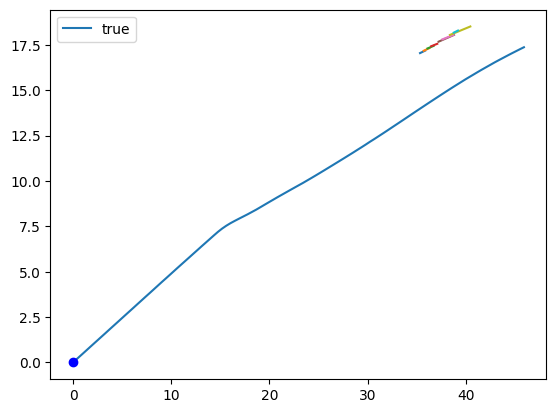

KeyboardInterrupt: 

In [15]:
# visualizer for correct trajectory, current trajectory, and y_bar (corrected delta_p)
import utils
import matplotlib.pyplot as plt

from IPython.display import display, clear_output

%matplotlib inline

#matplotlib.use('MacOSX')

fig, ax = plt.subplots()
while True:
    ax.clear()
    y_bar, y, tm, y_pred = utils.training_loop(config)
    sy = y[:, 0, :]
    syb = y_bar[:, 0, :]
    syp = y_pred[:, 0,:]
    stm = tm[:, 0, :]
    rsy = np.cumsum(sy, axis=0)
    rsyp = torch.cumsum(syp, dim=0).detach().numpy()
    rsyb = syb.detach().numpy() * stm.detach().numpy()
    ax.plot(rsy[:, 0].flatten(), rsy[:, 1].flatten(), label='true')
    #ax.plot(rsyp[:, 0].flatten(), rsyp[:, 1].flatten(), label='predicted')
    ax.plot(rsy[0, 0], rsy[0, 1], 'ob')
    ax.legend()
    for i in range(1, rsyb.shape[0]):
        ax.plot([rsyp[i - 1, 0], rsyp[i - 1, 0] + rsyb[i, 0]], [rsyp[i - 1, 1], rsyp[i - 1, 1] + rsyb[i, 1]])
    plt.show()
    display(fig)
    plt.pause(1)
    clear_output(wait=True)

In [227]:
matplotlib.rcsetup.all_backends

['GTK3Agg',
 'GTK3Cairo',
 'GTK4Agg',
 'GTK4Cairo',
 'MacOSX',
 'nbAgg',
 'QtAgg',
 'QtCairo',
 'Qt5Agg',
 'Qt5Cairo',
 'TkAgg',
 'TkCairo',
 'WebAgg',
 'WX',
 'WXAgg',
 'WXCairo',
 'agg',
 'cairo',
 'pdf',
 'pgf',
 'ps',
 'svg',
 'template']